<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-01-03-glm-logistic-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# **Logistic Regression Model (Binary Classification)**


This tutorial will focus on implementing a logistic regression model in R, a powerful open-source statistical software that provides numerous functions for easily fitting, interpreting, and visualizing these models. We will begin by reviewing the fundamentals of logistic models, which include understanding their structure, key components, and the types of data they are best suited to handle.

My approach will be step-by-step, starting with constructing a logistic model using synthetic data without relying on any built-in R packages. We will then demonstrate how to fit a logistic model using R's built-in functions (`glm`), interpret the model outputs, per and visualize the results using different R packages.

## Overview

**Logistic Regression** is a statistical and machine learning algorithm used for **binary classification** tasks—predicting the probability that an instance belongs to one of two classes (e.g., spam vs. not spam, disease vs. no disease). Despite its name, logistic regression is a **classification algorithm**, not a regression technique.

It models the relationship between a set of independent variables (features) and a binary dependent variable by estimating probabilities using a **logistic function** (also known as the **sigmoid function**).

## Key Components

### Sigmoid (Logistic) Function

The core of logistic regression is the **sigmoid function**, which maps any real-valued number into a value between 0 and 1, making it suitable for probability estimation.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- $ z $ is the linear combination of input features and weights.
- $ \sigma(z) $ outputs a value in $ (0, 1) $, interpreted as the probability of the positive class.


### Linear Combination (Logit)

The input to the sigmoid function is a linear combination of the features and their corresponding weights (parameters):

$$
z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \theta^T X
$$

Where:

- $ \theta_0 $ is the **intercept (bias)**.
- $ \theta_1, \theta_2, \dots, \theta_n $ are the **coefficients (weights)**.
- $ x_1, x_2, \dots, x_n $ are the **input features**.
- $ X $ is the feature vector.
- $ \theta $ is the parameter vector.


###  Hypothesis Function

The hypothesis in logistic regression gives the predicted probability that the output $ y = 1 $ given input $ X $:

$$
h_\theta(X) = P(y = 1 \mid X; \theta) = \sigma(\theta^T X) = \frac{1}{1 + e^{-\theta^T X}}
$$

The predicted class is determined by a threshold (typically 0.5):

$$
\hat{y} = 
\begin{cases}
1 & \text{if } h_\theta(X) \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

### Log-Odds (Logit)

The log-odds of the probability is linear in the inputs:

$$
\log\left(\frac{P(y=1 \mid X)}{P(y=0 \mid X)}\right) = \theta^T X
$$

This shows that logistic regression models the **log-odds** of the outcome as a linear function of the input features.


###  Cost Function (Log Loss)

Unlike linear regression, logistic regression uses **log loss** (cross-entropy loss) because the mean squared error is non-convex in this context.

The cost for a single training example is:

$$
J(\theta) = 
\begin{cases}
-\log(h_\theta(X)) & \text{if } y = 1 \\
-\log(1 - h_\theta(X)) & \text{if } y = 0
\end{cases}
$$

This can be combined into a single expression:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(X^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(X^{(i)})) \right]
$$

Where:

- $ m $ is the number of training examples.
- $ y^{(i)} $ is the true label of the $ i $-th example.
- $ h_\theta(X^{(i)}) $ is the predicted probability.

### Optimization (Parameter Estimation)

The goal is to **minimize the cost function** $ J(\theta) $ with respect to $ \theta $. Since there is no closed-form solution, optimization algorithms like **Gradient Descent** are used.

#### Gradient of the Cost Function:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(X^{(i)}) - y^{(i)}) x_j^{(i)}
$$

#### Parameter Update Rule (Gradient Descent):

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

Where:

- $ \alpha $ is the **learning rate**.
- The update is repeated until convergence.


### How It Works (Step-by-Step)


1. **Input**: A dataset with features $ X $ and binary labels $ y \in \{0, 1\} $.
2. **Initialize**: Set initial values for parameters $ \theta $ (often zeros or small random values).
3. **Compute Hypothesis**: For each input, compute $ h_\theta(X) = \sigma(\theta^T X) $.
4. **Compute Cost**: Use log loss to evaluate model performance.
5. **Update Parameters**: Use gradient descent (or other optimizers) to minimize cost.
6. **Repeat**: Iterate until convergence.
7. **Predict**: For new data, compute $ h_\theta(X) $ and apply threshold (e.g., 0.5) to classify.


### Applications

Logistic regression is widely used in various domains due to its simplicity, interpretability, and efficiency:

- **Medical Diagnosis**: Predicting presence or absence of a disease.
- **Credit Scoring**: Classifying loan applicants as high or low risk.
- **Marketing**: Predicting whether a customer will respond to a campaign.
- **Spam Detection**: Classifying emails as spam or not spam.
- **Image Classification**: Simple binary image classification tasks.
- **Natural Language Processing (NLP)**: Sentiment analysis (positive/negative).


### Advantages
- Simple and interpretable (coefficients indicate feature importance).
- Efficient to train and predict.
- Outputs probabilities, not just classes.
- Works well with small datasets.

### Limitations

- Assumes a linear decision boundary.
- Sensitive to outliers.
- Can underperform with complex, non-linear relationships.
- Requires feature independence (multicollinearity can affect stability).


## Building a Logistic Model  from Scratch

In this section, we will demonstrate how to build a logistic regression model in Python without using any external packages. We will start by generating synthetic data, then proceed to fit the model, compute summary statistics, and validate the model's performance through k-fold cross-validation. Below are the step-by-step instructions and explanations of the underlying mathematics involved.


In [17]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score


### Generate Synthetic Data

We need to create a dataset with:

-   One binary response variable (contaminated: Yes = 1, No = 0).

-   Four linear predictor variables (we'll call them x1, x2, x3, and x4).

-   One categorical variable with two levels (region: highland or lowland).

In [6]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Sample size
n = 100

# Generate covariates (continuous)
x1 = np.random.normal(loc=0, scale=1, size=n)
x2 = np.random.normal(loc=0, scale=1, size=n)
x3 = np.random.normal(loc=0, scale=1, size=n)
x4 = np.random.normal(loc=0, scale=1, size=n)

# Generate categorical variable 'region'
region = np.random.choice(['highland', 'lowland'], size=n)

# Define true coefficients
beta_0 = -1      # intercept
beta_1 = 0.5
beta_2 = -0.3
beta_3 = 0.2
beta_4 = 0.1
beta_5 = 0.7     # effect of being in "highland" region

# Calculate linear predictor (log-odds)
log_odds = (beta_0 + beta_1 * x1 + beta_2 * x2 + 
            beta_3 * x3 + beta_4 * x4 + 
            beta_5 * (region == 'highland'))

# Convert log-odds to probability using logistic function
probability = np.exp(log_odds) / (1 + np.exp(log_odds))

# Generate binary response variable
contaminated = np.random.binomial(n=1, p=probability, size=n)

# Combine into a DataFrame
data = pd.DataFrame({
    'contaminated': contaminated,
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,
    'region': region
})

# Display first few rows
print(data.head())



   contaminated        x1        x2        x3        x4    region
0             1  0.496714 -1.415371  0.357787 -0.828995  highland
1             1 -0.138264 -0.420645  0.560785 -0.560181  highland
2             1  0.647689 -0.342715  1.083051  0.747294  highland
3             1  1.523030 -0.802277  1.053802  0.610370  highland
4             0 -0.234153 -0.161286 -1.377669 -0.020902   lowland


### Define the Log-Likelihood Function

To fit a logistic regression without using `glm()` or any packages, we need to implement `maximum likelihood estimation (MLE)` from scratch. This involves defining the likelihood function for logistic regression and then using numerical optimization to estimate the coefficients.



The probability that an observation $Y_i = 1$ (contaminated = Yes) given predictor variables $X_i$ is given by:

$$ P(Y_i = 1 | X_i) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \beta_4 x_{i4} + \beta_5 \text{region}_i)}} $$

The log-likelihood function for logistic regression, which we want to maximize, is:

$$ \text{log-likelihood} = \sum_{i=1}^n \left( Y_i \cdot \log(P(Y_i = 1 | X_i)) + (1 - Y_i) \cdot \log(1 - P(Y_i = 1 | X_i)) \right) $$

Let's write this in Pythonwhere `params` will represent the vector of coefficients $\beta$.


In [7]:
def log_likelihood(params, data):
    # Extract coefficients
    beta_0, beta_1, beta_2, beta_3, beta_4, beta_5 = params
    
    # Calculate linear predictor (log-odds)
    log_odds = (beta_0 + beta_1 * data['x1'] + 
                beta_2 * data['x2'] + 
                beta_3 * data['x3'] + 
                beta_4 * data['x4'] + 
                beta_5 * (data['region'] == 'highland'))
    
    # Logistic transformation: probability
    probability = 1 / (1 + np.exp(-log_odds))
    
    # Avoid log(0) by clipping probabilities
    eps = 1e-15
    probability = np.clip(probability, eps, 1 - eps)
    
    # Log-likelihood
    ll = np.sum(data['contaminated'] * np.log(probability) + 
                (1 - data['contaminated']) * np.log(1 - probability))
    
    return -ll  # Return negative for minimization

### Optimize the Log-Likelihood Function

We use `optim()` to find the parameter values that maximize the likelihood (minimizes the negative log-likelihood).

In [8]:
# Initial guesses for coefficients
initial_params = np.zeros(6)

# Run optimization
result = minimize(log_likelihood, initial_params, args=(data,), method='BFGS', hess=True)

# Extract estimated parameters
estimated_params = result.x
print("Estimated Coefficients:", estimated_params)

/tmp/ipykernel_549228/812670818.py:5: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  result = minimize(log_likelihood, initial_params, args=(data,), method='BFGS', hess=True)


Estimated Coefficients: [-1.72223814  0.56151745 -0.67090996  0.63771895 -0.36066612  1.4468616 ]


### Standard Errors, Z-values, and p-values

In [11]:
# Get Hessian matrix
hessian = result.hess_inv  # Inverse Hessian (BFGS approximation)
# Or use: hessian = result.hess if available

# Variance-covariance matrix
try:
    vcov_matrix = hessian  # For BFGS, hess_inv is already approx. inverse
except:
    vcov_matrix = np.linalg.inv(result.hess)

# Standard errors
standard_errors = np.sqrt(np.diag(vcov_matrix))

# Z-values and p-values
z_values = estimated_params / standard_errors
p_values = 2 * (1 - norm.cdf(np.abs(z_values)))

# Create summary table
summary_table = pd.DataFrame({
    'Coefficient': estimated_params,
    'Std_Error': standard_errors,
    'Z_value': z_values,
    'p_value': p_values
})

print(summary_table)

   Coefficient  Std_Error   Z_value   p_value
0    -1.722238   0.433556 -3.972355  0.000071
1     0.561517   0.306666  1.831041  0.067094
2    -0.670910   0.280882 -2.388579  0.016914
3     0.637719   0.254278  2.507956  0.012143
4    -0.360666   0.294092 -1.226373  0.220058
5     1.446862   0.523692  2.762812  0.005731



### Odds Ratio (OR)

The odds ratio is a measure commonly used in logistic regression, to quantify the strength of association between two events. It represents the odds of an event occurring in one group compared to the odds of it occurring in another group. The odds ratio is calculated as the exponentiated coefficient of a predictor variable.

The odds ratio helps us understand how a one-unit increase in a predictor variable affects the odds of the outcome. Here’s how to interpret it:

-   OR = 1: The predictor does not change the odds of the outcome (no effect).

-   OR \> 1: The predictor increases the odds of the outcome. For instance, if OR = 1.5, a one-unit increase in the predictor increases the odds of the outcome by 50%.

-   OR \< 1: The predictor decreases the odds of the outcome. For example, if OR = 0.7, a one-unit increase in the predictor decreases the odds of the outcome by 30%.

In [12]:
# Exponentiate coefficients (excluding intercept)
odd_ratios = np.exp(estimated_params[1:])  # ORs for x1, x2, x3, x4, region
print("Odds Ratios:", odd_ratios)

Odds Ratios: [1.75333107 0.51124315 1.89215985 0.69721175 4.24975615]


### Model Performance

Evaluating the performance of a logistic regression model involves several metrics and techniques to understand how well the model predicts the outcome variable (e.g., contaminated vs. not contaminated). Here’s a detailed overview of the key evaluation metrics and methods commonly used in this context:

#### Confusion Matrix

A confusion matrix is a simple yet powerful tool for evaluating the performance of a classification model. It provides a summary of prediction results on a classification problem. The confusion matrix summarizes:

-   **True Positives (TP)**: Correctly predicted positive instances.
-   **True Negatives (TN)**: Correctly predicted negative instances.
-   **False Positives (FP)**: Incorrectly predicted positive instances (Type I error).
-   **False Negatives (FN)**: Incorrectly predicted negative instances (Type II error).

**Confusion Matrix Layout**:

|                        | Actual Positive (1) | Actual Negative (0) |
|------------------------|---------------------|---------------------|
| Predicted Positive (1) | TP                  | FP                  |
| Predicted Negative (0) | FN                  | TN                  |


In [13]:
# Compute predicted log-odds and probabilities
log_odds_pred = (estimated_params[0] + 
                 estimated_params[1] * data['x1'] +
                 estimated_params[2] * data['x2'] +
                 estimated_params[3] * data['x3'] +
                 estimated_params[4] * data['x4'] +
                 estimated_params[5] * (data['region'] == 'highland'))

predicted_probabilities = 1 / (1 + np.exp(-log_odds_pred))

# Classify with threshold 0.5
predicted_class = (predicted_probabilities > 0.5).astype(int)
actual_class = data['contaminated'].values

# Confusion Matrix
confusion_matrix = pd.crosstab(predicted_class, actual_class, 
                               rownames=['Predicted'], colnames=['Actual'])
print(confusion_matrix)

# Extract TP, TN, FP, FN
TP = confusion_matrix.loc[1, 1] if (1 in confusion_matrix.index and 1 in confusion_matrix.columns) else 0
TN = confusion_matrix.loc[0, 0] if (0 in confusion_matrix.index and 0 in confusion_matrix.columns) else 0
FP = confusion_matrix.loc[1, 0] if (1 in confusion_matrix.index and 0 in confusion_matrix.columns) else 0
FN = confusion_matrix.loc[0, 1] if (0 in confusion_matrix.index and 1 in confusion_matrix.columns) else 0

Actual      0   1
Predicted        
0          60  14
1           7  19


### Performance Metrics

From the confusion matrix, several performance metrics can be derived:

- ***Accuracy***: The proportion of total correct predictions.
  
  $$   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

- ***Precision*** (Positive Predictive Value): The proportion of predicted positives that are actual positives.
  
  $$   \text{Precision} = \frac{TP}{TP + FP} $$

 - ***Recall*** (Sensitivity or True Positive Rate): The proportion of actual positives that are correctly predicted.
  
  $$ \text{Recall} = \frac{TP}{TP + FN} $$


- ***Specificity*** (True Negative Rate): The proportion of actual negatives that are correctly predicted.
  
  $$   \text{Specificity} = \frac{TN}{TN + FP} $$

- ***F1 Score***: The harmonic mean of precision and recall, useful when dealing with imbalanced classes.
  
  $$ \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

In [14]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.79
Precision: 0.7307692307692307
Recall: 0.5757575757575758
Specificity: 0.8955223880597015
F1 Score: 0.6440677966101696


#### Receiver Operating Characteristic (ROC) Curve and AUC

The ROC curve is an important tool used in evaluating the performance of a binary classification model. It is a graphical plot that illustrates how well the model can distinguish between positive and negative classes at different threshold settings. The curve displays the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) as the threshold for classification changes. The true positive rate measures the proportion of actual positive instances that are correctly identified by the model, while the false positive rate measures the proportion of actual negative instances that are incorrectly classified as positive by the model. By analyzing the ROC curve, one can determine the optimal threshold setting that maximizes the true positive rate and minimizes the false positive rate, thereby improving the overall accuracy of the classification model.

-   **True Positive Rate (TPR)**: The y-axis represents the true positive rate (sensitivity).
-   **False Positive Rate (FPR)**: The x-axis represents the false positive rate.

A typical ROC appears as a line that starts at the bottom left corner (0, 0) and extends towards the top right corner (1, 1). If the curve is closer to the top-left corner, it indicates better performance of the model. A diagonal line from (0, 0) to (1, 1) on the ROC curve represents the performance of a random classifier. A model with perfect discrimination will have an ROC curve passing through the top-left corner, indicating a true positive rate of 1 (sensitivity) and a false positive rate of 0 (specificity). The area under the ROC curve (AUC-ROC) is a widely used summary statistic for quantifying the performance of a classification model. AUC-ROC ranges from 0 to 1, with higher values indicating better discrimination. An AUC-ROC of 0.5 suggests that the model performs no better than random guessing, while an AUC-ROC of 1 indicates perfect classification. To summarize, the ROC curve provides a clear visualization of a classification model's performance across different threshold settings. This allows users to select an appropriate threshold based on their specific needs for sensitivity and specificity.

The Area Under the Curve (AUC) quantifies the overall ability of the model to discriminate between the positive and negative classes:

-   **AUC = 1**: Perfect discrimination.
-   **AUC = 0.5**: No discrimination (random guessing).

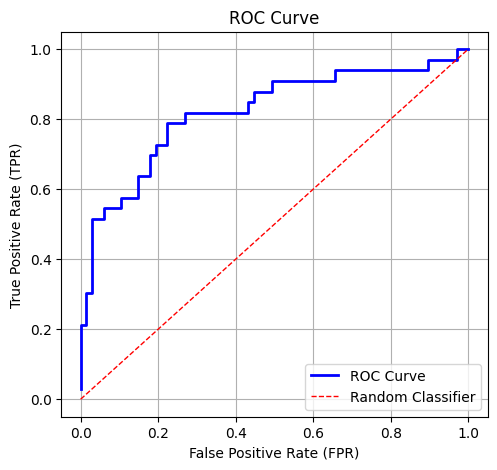

In [19]:
# Sort data by predicted probabilities (descending)
roc_data = pd.DataFrame({'probability': predicted_probabilities, 'actual': actual_class})
roc_data = roc_data.sort_values(by='probability', ascending=False)

# Compute TPR and FPR
TPR = np.cumsum(roc_data['actual']) / np.sum(roc_data['actual'])
FPR = np.cumsum(1 - roc_data['actual']) / np.sum(1 - roc_data['actual'])

# Convert to numpy arrays to avoid pandas indexing issues
FPR = np.array(FPR)
TPR = np.array(TPR)

# Plot ROC Curve
plt.figure(figsize=(5.5, 5))
plt.plot(FPR, TPR, color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
#plt.text(0.6, 0.2, f'AUC = {AUC:.2f}', color='black', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###  Log-Likelihood and Pseudo-R²

In [20]:
def compute_log_likelihood(params, data):
    beta_0, beta_1, beta_2, beta_3, beta_4, beta_5 = params
    log_odds = (beta_0 + beta_1 * data['x1'] + 
                beta_2 * data['x2'] + 
                beta_3 * data['x3'] + 
                beta_4 * data['x4'] + 
                beta_5 * (data['region'] == 'highland'))
    prob = 1 / (1 + np.exp(-log_odds))
    prob = np.clip(prob, 1e-15, 1 - 1e-15)
    ll = np.sum(data['contaminated'] * np.log(prob) + 
                (1 - data['contaminated']) * np.log(1 - prob))
    return ll

# Full model log-likelihood
ll_full = compute_log_likelihood(estimated_params, data)

# Null model log-likelihood (intercept only)
p_null = data['contaminated'].mean()
ll_null = np.sum(data['contaminated'] * np.log(p_null) + 
                 (1 - data['contaminated']) * np.log(1 - p_null))

# McFadden's Pseudo R²
pseudo_r2 = 1 - (ll_full / ll_null)

print(f"Log-Likelihood of the model: {ll_full}")
print(f"Log-Likelihood of the null model: {ll_null}")
print(f"Pseudo-R²: {pseudo_r2}")

Log-Likelihood of the model: -47.34156366136981
Log-Likelihood of the null model: -63.41786357122056
Pseudo-R²: 0.253497973671038


### k-Fold Cross-Validation

In [21]:
from sklearn.model_selection import KFold

# Set seed for reproducibility
np.random.seed(42)

# Prepare data
X = data[['x1', 'x2', 'x3', 'x4', 'region']].copy()
y = data['contaminated'].copy()

# k-Fold CV
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
metrics = {
    'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []
}

for train_index, val_index in kf.split(X):
    # Split data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Combine into training and validation DataFrames
    train_data = X_train.copy()
    train_data['contaminated'] = y_train.values
    val_data = X_val.copy()
    val_data['contaminated'] = y_val.values
    
    # Fit model on training data
    result_cv = minimize(log_likelihood, initial_params, args=(train_data,), method='BFGS')
    params_cv = result_cv.x
    
    # Predict on validation set
    log_odds_val = (params_cv[0] + 
                    params_cv[1] * val_data['x1'] +
                    params_cv[2] * val_data['x2'] +
                    params_cv[3] * val_data['x3'] +
                    params_cv[4] * val_data['x4'] +
                    params_cv[5] * (val_data['region'] == 'highland'))
    prob_val = 1 / (1 + np.exp(-log_odds_val))
    pred_class = (prob_val > 0.5).astype(int)
    
    # Confusion matrix
    cm = pd.crosstab(pred_class, val_data['contaminated'], rownames=['Pred'], colnames=['Actual'])
    
    TP = cm.loc[1, 1] if (1 in cm.index and 1 in cm.columns) else 0
    TN = cm.loc[0, 0] if (0 in cm.index and 0 in cm.columns) else 0
    FP = cm.loc[1, 0] if (1 in cm.index and 0 in cm.columns) else 0
    FN = cm.loc[0, 1] if (0 in cm.index and 1 in cm.columns) else 0
    
    # Metrics
    acc = (TP + TN) / (TP + TN + FP + FN + 1e-8)
    prec = TP / (TP + FP + 1e-8)
    rec = TP / (TP + FN + 1e-8)
    f1 = 2 * (prec * rec) / (prec + rec + 1e-8)
    
    metrics['accuracy'].append(acc)
    metrics['precision'].append(prec)
    metrics['recall'].append(rec)
    metrics['f1_score'].append(f1)

# Average metrics
avg_metrics = {k: np.mean(v) for k, v in metrics.items()}
print("Cross-Validation Average Metrics:")
for metric, value in avg_metrics.items():
    print(f"Average {metric.capitalize()}: {value:.4f}")

Cross-Validation Average Metrics:
Average Accuracy: 0.7400
Average Precision: 0.6400
Average Recall: 0.5529
Average F1_score: 0.5758


#### Confusion Matrix

A confusion matrix is a simple yet powerful tool for evaluating the performance of a classification model. It provides a summary of prediction results on a classification problem. The confusion matrix summarizes:

- **True Positives (TP)**: Correctly predicted positive instances.
- **True Negatives (TN)**: Correctly predicted negative instances.
- **False Positives (FP)**: Incorrectly predicted positive instances (Type I error).
- **False Negatives (FN)**: Incorrectly predicted negative instances (Type II error).

**Confusion Matrix Layout**:

|               | Actual Positive (1) | Actual Negative (0) |
|---------------|---------------------|---------------------|
| Predicted Positive (1) | TP                  | FP                  |
| Predicted Negative (0) | FN                  | TN                  |

## Logistic Model with Python

The `glm()` function in R is commonly used to fit generalized linear models, including logistic regression. Here’s a guide on how to fit a logistic regression model with `glm()`.

### Data

The **Pima Indians Diabetes Dataset** contains health measurements for 768 Pima Indian women from Arizona, used to predict whether a patient has **type 2 diabetes** (binary outcome: 1 = yes, 0 = no).  

**Features**:  
- Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age  

**Key Notes**:  

- All patients are female, ≥21 years old.  
- Zero values in Glucose, BloodPressure, SkinThickness, Insulin, and BMI are likely **missing data** and should be handled.  
- Class distribution: ~65% non-diabetic, ~35% diabetic (mildly imbalanced).  

**Use**:  
Commonly used for teaching **binary classification**, logistic regression, and model evaluation (e.g., ROC, accuracy).  


**Source**: UCI Machine Learning Repository (publicly available).


In [ ]:
!pip install pandas numpy matplotlib seaborn plotnine scikit-learn statsmodels patsy

In [3]:
import pandas as pd

# Load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
pima = pd.read_csv(url, names=column_names)

print(pima.head())
print(pima.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

### Data Processing

In [4]:
import numpy as np

# Convert Outcome to categorical: 0 -> "No", 1 -> "Yes"
pima['Outcome'] = pima['Outcome'].map({0: 'No', 1: 'Yes'}).astype('category')

# Replace 0 values with NaN for meaningful variables
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
pima[zero_columns] = pima[zero_columns].replace(0, np.nan)

# Drop rows with missing values
pima.dropna(inplace=True)

# Normalize numerical features (min-max scaling)
from sklearn.preprocessing import MinMaxScaler

features = pima.select_dtypes(include=[np.number]).columns.tolist()
scaler = MinMaxScaler()
pima[features] = scaler.fit_transform(pima[features])

# Add back Outcome (categorical)
df = pima.copy()

print(df.head())

    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
3      0.058824  0.232394       0.488372       0.285714  0.096154  0.202454   
4      0.000000  0.570423       0.186047       0.500000  0.185096  0.509202   
6      0.176471  0.154930       0.302326       0.446429  0.088942  0.261759   
8      0.117647  0.992958       0.534884       0.678571  0.635817  0.251534   
13     0.058824  0.936620       0.418605       0.285714  1.000000  0.243354   

    DiabetesPedigreeFunction       Age Outcome  
3                   0.035118  0.000000      No  
4                   0.943469  0.200000     Yes  
6                   0.069807  0.083333     Yes  
8                   0.031263  0.533333     Yes  
13                  0.134047  0.633333     Yes  


#### Box/Violine Plots



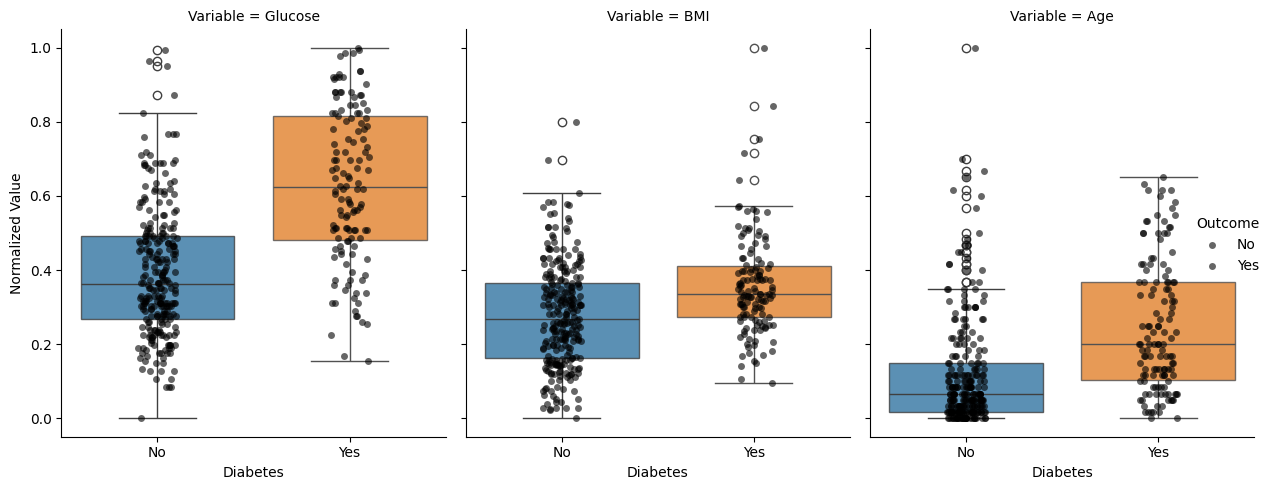

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt data for easier plotting
df_melt = df.melt(id_vars=['Outcome'], 
                  value_vars=['Glucose', 'BMI', 'Age'], 
                  var_name='Variable', value_name='Value')

g = sns.FacetGrid(df_melt, col='Variable', hue='Outcome', col_wrap=3, height=5, aspect=0.8)
g.map(sns.boxplot, 'Outcome', 'Value', order=['No', 'Yes'], fill=True, boxprops=dict(alpha=0.8))
g.map(sns.stripplot, 'Outcome', 'Value', order=['No', 'Yes'], alpha=0.6, jitter=True, color='black')
g.set_axis_labels("Diabetes", "Normalized Value")
g.add_legend()
plt.tight_layout()
plt.show()

#### Split Data



In [8]:
from sklearn.model_selection import train_test_split

# Stratified split by Outcome
train, test = train_test_split(
    df, 
    test_size=0.3, 
    stratify=df['Outcome'], 
    random_state=101
)

# Check distribution
print("Train distribution:")
print(train['Outcome'].value_counts(normalize=True))
print("\nTest distribution:")
print(test['Outcome'].value_counts(normalize=True))

Train distribution:
Outcome
No     0.667883
Yes    0.332117
Name: proportion, dtype: float64

Test distribution:
Outcome
No     0.669492
Yes    0.330508
Name: proportion, dtype: float64


Stratified random sampling is a technique for selecting a representative sample from a population, where the sample is chosen in a way that ensures that certain subgroups within the population are adequately represented in the sample.

### Fit a Logistic Model

We will use **logistic regression** to predict probability of `outcome` based on of the selected features.  We will use `glm()` function with `family = binomial(link = "logit"))` for logistic regression. The `Class_As` variable will be used as a response variable, while all the other variables in the `train` will serve as predictors.



In [3]:
import statsmodels.api as sm

# Prepare data
X_train = train.drop('Outcome', axis=1)
y_train = (train['Outcome'] == 'Yes').astype(int)

# Add intercept
X_train_const = sm.add_constant(X_train)

# Fit model
fit_logit = sm.Logit(y_train, X_train_const).fit()

print(fit_logit.summary())

NameError: name 'train' is not defined

#### Model Summary (jtools::summ equivalent

In [ ]:
from scipy import stats
import numpy as np

def logit_summary(model):
    params = model.params
    conf = model.conf_int()
    conf['Odds Ratio'] = np.exp(params)
    conf['std err'] = model.bse
    conf['z'] = model.tvalues
    conf['P>|z|'] = model.pvalues
    conf = conf[['Odds Ratio', 'std err', 'z', 'P>|z|', 0, 1]]
    conf.columns = ['OR', 'std err', 'z', 'P>|z|', '2.5%', '97.5%']
    return conf

print(logit_summary(fit_logit))

                                  OR   std err         z         P>|z|  \
const                       0.002224  0.899202 -6.793247  1.096372e-11   
Pregnancies                 5.418117  1.074876  1.572040  1.159412e-01   
Glucose                   214.577840  1.020295  5.261881  1.425889e-07   
BloodPressure               3.709618  1.249017  1.049568  2.939168e-01   
SkinThickness               2.538869  1.126177  0.827329  4.080507e-01   
Insulin                     0.371939  1.234588 -0.801098  4.230750e-01   
BMI                         3.727330  1.649517  0.797623  4.250895e-01   
DiabetesPedigreeFunction   21.734415  1.157897  2.659043  7.836293e-03   
Age                        10.067883  1.283804  1.798835  7.204486e-02   

                              2.5%     97.5%  
const                    -7.870903 -4.346097  
Pregnancies              -0.416970  3.796467  
Glucose                   3.368931  7.368415  
BloodPressure            -1.137100  3.758958  
SkinThickness           

### Interpretation of Logistic Model



In [15]:
print("=== Model Interpretation ===")
print(f"The model uses {len(fit_logit.params)-1} predictors to predict diabetes.")
print(f"Pseudo R-squared: {fit_logit.prsquared:.3f}")
print("Significant predictors (p < 0.05):")
sig_vars = fit_logit.pvalues[fit_logit.pvalues < 0.05].index[1:]  # exclude const
for var in sig_vars:
    print(f" - {var}: OR = {np.exp(fit_logit.params[var]):.2f}")

=== Model Interpretation ===
The model uses 8 predictors to predict diabetes.
Pseudo R-squared: 0.317
Significant predictors (p < 0.05):
 - Glucose: OR = 214.58
 - DiabetesPedigreeFunction: OR = 21.73


### Model Performance

In [23]:
# Predict on training data
y_train_pred_prob = fit_logit.predict(sm.add_constant(X_train))

# Tjur's R²
y_true = y_train
y_pred = y_train_pred_prob
tjur_r2 = y_pred[y_true==1].mean() - y_pred[y_true==0].mean()

print(f"Tjur's R²: {tjur_r2:.3f}")
# Other metrics
logloss = log_loss(y_true, y_pred)
pcp = accuracy_score(y_true, (y_pred > 0.5).astype(int))

print("Model Performance:")
print(f"Tjur's R²: {tjur_r2:.3f}")
print(f"Log Loss: {logloss:.3f}")
print(f"PCP (Accuracy): {pcp:.3f}")
print(f"AUC: {roc_auc_score(y_true, y_pred):.3f}")

Tjur's R²: 0.370
Model Performance:
Tjur's R²: 0.370
Log Loss: 0.434
PCP (Accuracy): 0.785
AUC: 0.862


**`Tjur's R²`**, also known as Tjur's coefficient of discrimination, is a measure of discrimination or predictive accuracy for binary outcomes in logistic regression. It assesses how well the model distinguishes between the two categories of the dependent variable. Tjur's R² is defined as the difference in the average predicted probabilities of the two outcomes.

The formula for Tjur's R² is as follows:

$$ R^2_{Tjur} = P(Y=1|\hat{Y}=1) - P(Y=0|\hat{Y}=1) $$

Here:

-   $P(Y=1|\hat{Y}=1)$ is the probability of the actual outcome being 1 given that the predicted outcome is 1.

-   $P(Y=0|\hat{Y}=1)$ is the probability of the actual outcome being 0 given that the predicted outcome is 1.

Tjur's R² ranges from -1 to 1, where a higher value indicates better discrimination. A positive value suggests that the model is better at predicting the positive class, while a negative value suggests better prediction for the negative class.

In practice, Tjur's R² is not as commonly used as other metrics like the area under the ROC curve (AUC) or the Brier score, but it provides a measure of the practical significance of the logistic regression model in terms of discrimination. Keep in mind that the interpretation of Tjur's R² should be done in the context of the specific dataset and problem you are working on.

**`Log_loss`**: Logarithmic Loss (Log Loss), also known as cross-entropy loss, is a commonly utilized loss function in machine learning, particularly in classification problems. It measures the performance of a classification model that outputs a probability value ranging from 0 to 1. Due to its versatility and capability to handle prediction errors, Logarithmic Loss is often preferred over alternative loss functions. Its formulation is mathematically rigorous, and its implementation is straightforward, making it an essential tool for any machine learning practitioner.

The formula for Log Loss is:

$$ {Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)] $$

Where:

\- $N$ is the number of samples in the dataset.

\- $y_i$ is the true label for the $i$ th sample (0 or 1 for binary classification, or one-hot encoded vectors for multiclass classification).

-   $p_i$ is the predicted probability that the $i$ th sample belongs to the positive class.



 ### Check Model Assumptions

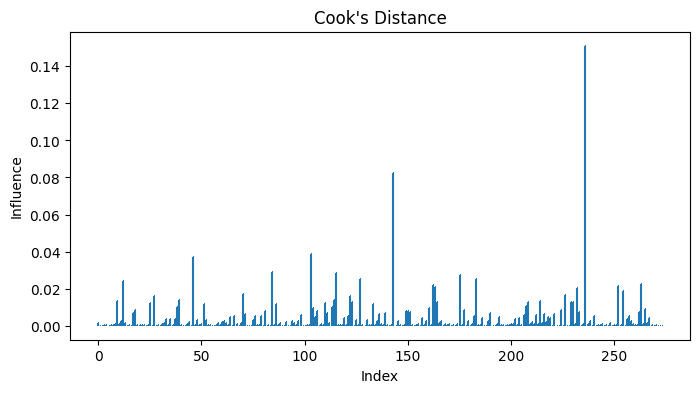

VIF for multicollinearity:
                   Variable        VIF
0               Pregnancies   3.751346
1                   Glucose   9.412679
2             BloodPressure   9.756997
3             SkinThickness   9.525809
4                   Insulin   3.551759
5                       BMI  10.654888
6  DiabetesPedigreeFunction   2.677887
7                       Age   3.896126


In [25]:
# Use statsmodels for residual analysis
influence = fit_logit.get_influence()
cooks = influence.cooks_distance[0]

# Plot Cook's distance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.stem(cooks, markerfmt=",", basefmt=" ")
plt.title("Cook's Distance")
plt.ylabel("Influence")
plt.xlabel("Index")
plt.show()

# Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("VIF for multicollinearity:")
print(vif)

### Odds Ratios

In [27]:
# Odds Ratios
odds_ratios = np.exp(fit_logit.params)
print("Odds Ratios:")
print(odds_ratios)

# Using statsmodels to get confidence intervals
conf_int = np.exp(fit_logit.conf_int())
conf_int['OR'] = np.exp(fit_logit.params)
conf_int = conf_int[['OR', 0, 1]]
conf_int.columns = ['OR', '2.5%', '97.5%']
print(conf_int)

# Using statsmodels to get confidence intervals
conf_int = np.exp(fit_logit.conf_int())
conf_int['OR'] = np.exp(fit_logit.params)
conf_int = conf_int[['OR', 0, 1]]
conf_int.columns = ['OR', '2.5%', '97.5%']
print(conf_int)

Odds Ratios:
const                         0.002224
Pregnancies                   5.418117
Glucose                     214.577840
BloodPressure                 3.709618
SkinThickness                 2.538869
Insulin                       0.371939
BMI                           3.727330
DiabetesPedigreeFunction     21.734415
Age                          10.067883
dtype: float64
                                  OR       2.5%        97.5%
const                       0.002224   0.000382     0.012957
Pregnancies                 5.418117   0.659041    44.543517
Glucose                   214.577840  29.047446  1585.118712
BloodPressure               3.709618   0.320748    42.903694
SkinThickness               2.538869   0.279278    23.080426
Insulin                     0.371939   0.033082     4.181718
BMI                         3.727330   0.147003    94.508114
DiabetesPedigreeFunction   21.734415   2.246697   210.257414
Age                        10.067883   0.813135   124.656192
           

###  Plot Model Estimates (like sjPlot::plot_model)

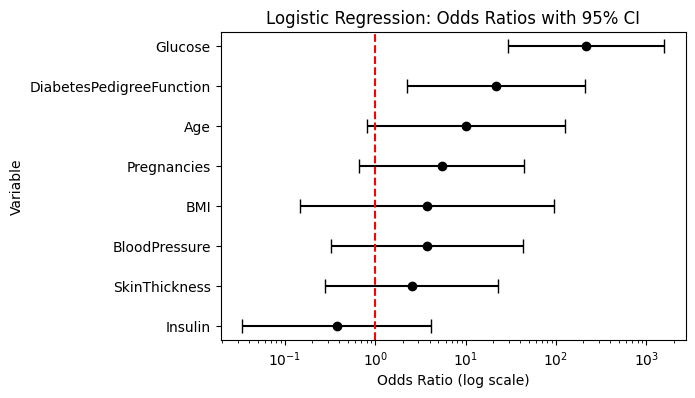

In [28]:
import matplotlib.pyplot as plt

# Exclude intercept
or_data = conf_int.iloc[1:].copy()
or_data['Variable'] = or_data.index
or_data = or_data.sort_values('OR')

plt.figure(figsize=(6, 4))
plt.errorbar(or_data['OR'], or_data['Variable'], 
             xerr=[or_data['OR'] - or_data['2.5%'], or_data['97.5%'] - or_data['OR']], 
             fmt='o', capsize=5, color='black')
plt.axvline(1, color='red', linestyle='--')
plt.xlabel('Odds Ratio (log scale)')
plt.ylabel('Variable')
plt.xscale('log')
plt.title('Logistic Regression: Odds Ratios with 95% CI')
plt.show()

### Marginal Effects

In [32]:
def get_margeff_for_variable(model, var_name, at='overall', method='dydx'):
    margeff = model.get_margeff(at=at, method=method)
    summary_df = pd.DataFrame(margeff.summary().tables[1])
    summary_df.columns = ['variable', 'dy/dx', 'std err', 'z', 'P>|z|', '[0.025', '0.975]']
    summary_df['variable'] = summary_df['variable'].str.strip()
    return summary_df[summary_df['variable'] == var_name]

# Usage:
margins_bmi = get_margeff_for_variable(logit_model, 'BMI')
print(margins_bmi)

Empty DataFrame
Columns: [variable, dy/dx, std err, z, P>|z|, [0.025, 0.975]]
Index: []


### Predicted Probabilities & Effects Plots

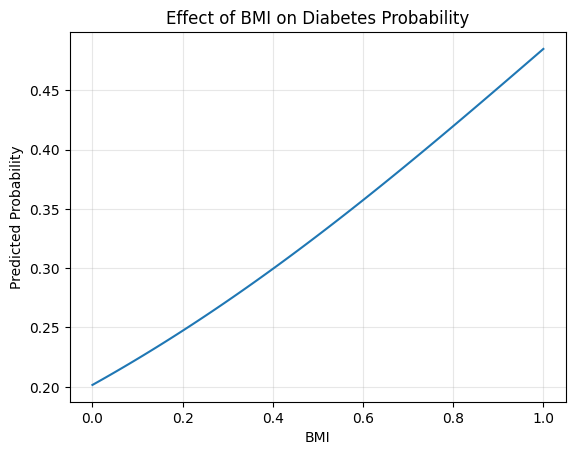

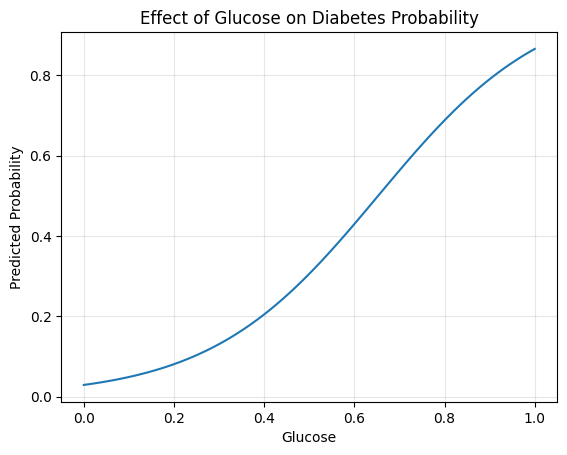

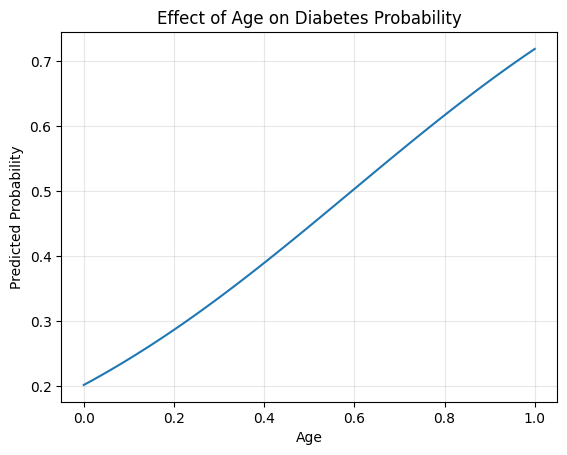

In [33]:
from matplotlib import ticker

def plot_effect(model, data, pred, num_points=100):
    # Get mean values for other variables
    X_mean = X_train_const.mean(axis=0).values
    pred_idx = X_train_const.columns.get_loc(pred)
    
    x_vals = np.linspace(data[pred].min(), data[pred].max(), num_points)
    y_probs = []

    for x in x_vals:
        X_mean[pred_idx] = x
        prob = model.predict(X_mean)[0]
        y_probs.append(prob)

    plt.plot(x_vals, y_probs, label=pred)
    plt.xlabel(pred)
    plt.ylabel('Predicted Probability')
    plt.title(f'Effect of {pred} on Diabetes Probability')
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot effect of BMI
plot_effect(fit_logit, df, 'BMI')
plot_effect(fit_logit, df, 'Glucose')
plot_effect(fit_logit, df, 'Age')

### Cross-Validation

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

# Prepare full data
X = df.drop('Outcome', axis=1)
y = (df['Outcome'] == 'Yes').astype(int)

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression())
])

# k-fold CV predictions
y_proba_cv = cross_val_predict(pipeline, X, y, cv=5, method='predict_proba')[:, 1]

print("First 5 predicted probabilities (CV):", y_proba_cv[:5])

First 5 predicted probabilities (CV): [0.03170981 0.81931683 0.03725703 0.83998549 0.6985749 ]


### Cross-Validation Performance

In [36]:
# Predicted class
y_pred_cv = (y_proba_cv > 0.5).astype(int)
y_true = y

# Confusion matrix elements
TN, FP, FN, TP = confusion_matrix(y_true, y_pred_cv).ravel()

# Metrics
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Cross-Validation Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1_score:.3f}")

Cross-Validation Metrics:
Accuracy: 0.786
Precision: 0.730
Recall: 0.562
F1 Score: 0.635


### Cross-Validation ROC Curve

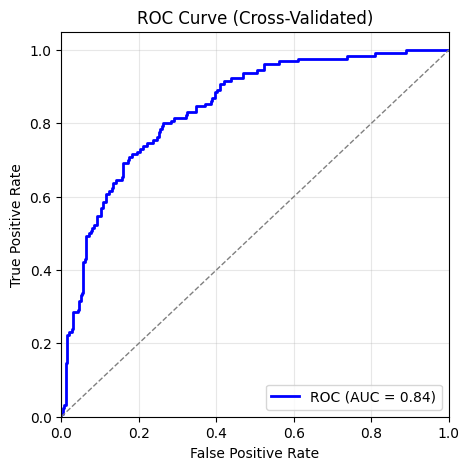

In [37]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_proba_cv)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Cross-Validated)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

### Prediction on Test Set and Evaluation 

In [38]:
# Prepare test data
X_test = test.drop('Outcome', axis=1)
y_test = (test['Outcome'] == 'Yes').astype(int)
X_test_const = sm.add_constant(X_test)

# Predict
test['Pred_prob'] = fit_logit.predict(X_test_const)
test['Pred_Class'] = ['Yes' if p > 0.5 else 'No' for p in test['Pred_prob']]

#### Confusion Matrix

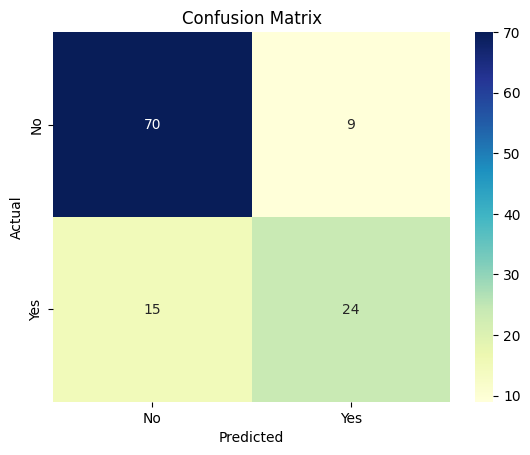

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test['Outcome'], test['Pred_Class'], labels=['No', 'Yes'])
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##### Test Performance Metrics

In [40]:
from sklearn.metrics import classification_report

print(classification_report(test['Outcome'], test['Pred_Class']))

# Or manually
TP, FP, FN, TN = cm.ravel()
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1 Score: {f1_score:.3f}")

              precision    recall  f1-score   support

          No       0.82      0.89      0.85        79
         Yes       0.73      0.62      0.67        39

    accuracy                           0.80       118
   macro avg       0.78      0.75      0.76       118
weighted avg       0.79      0.80      0.79       118

Accuracy: 0.797
Precision: 0.886
Recall: 0.824
Specificity: 0.727
F1 Score: 0.854


 #### ROC Curve on Test Set

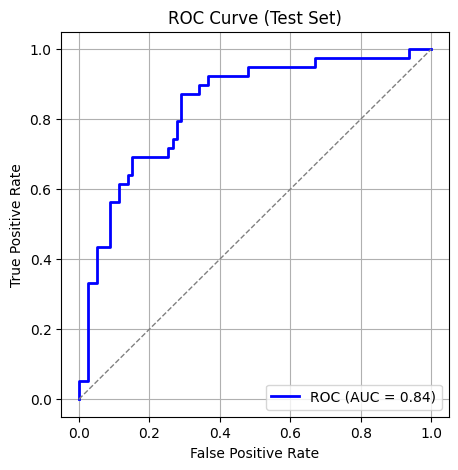

Best threshold: 0.242


In [41]:
fpr, tpr, thresholds = roc_curve((test['Outcome']=='Yes').astype(int), test['Pred_prob'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Best threshold
optimal_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[optimal_idx]
print(f"Best threshold: {best_threshold:.3f}")

## Summary and Conclusions

This tutorial explains how to apply logistic regression to perform binary classification wit Python. It covers data preparation, model fitting, evaluation, and interpretation of results. It also provides insights into interpreting the coefficients of the logistic regression model and discusses potential challenges. By following this tutorial, readers can gain a solid understanding of logistic regression analysis in Python. At the end of this tutorial, you will have a comprehensive understanding of how to implement logistic regression in Python, interpret the results, and evaluate the model's performance. This knowledge will enable you to apply logistic regression to real-world binary classification problems effectively.

## References

1.  [Applied Logistic Regression (Second Edition)](https://stats.oarc.ucla.edu/examples/alr2/) by David Hosmer and Stanley Lemeshow

2.  [Stat Books for Loan, Logistic Regression and Limited Dependent Variables](https://stats.oarc.ucla.edu/books/#Logistic%20Regression%20and%20Related%20Methods)

3. [Statistical Learning with Python (ISLR)](https://www.statlearning.com/)

4. [Scikit-learn Documentation – Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

5. [Statsmodels Documentation – Logistic Regression](https://www.statsmodels.org/stable/discrete.html#logit)

6. [DataCamp: "Logistic Regression in Python" Course](https://www.datacamp.com/courses/logistic-regression-in-python])




